In [73]:
from pylab import *
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [5]:
df = pd.read_csv('homework.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [75]:
df.isnull().any()
# Пропусков нет

ID         False
crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [11]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


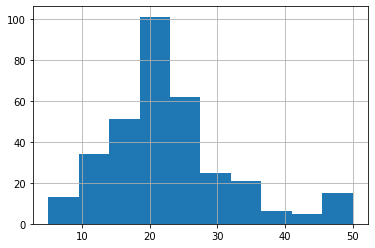

In [104]:
# Посмотрим распределение показателя medv. судя по всему средняя стоимость дома колеблется от 20 до 25 тыс долл
df.medv.hist()

In [105]:
# Нормализуем значения
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df)
df_norm = pd.DataFrame(np_scaled)
headers = list(df.columns.values)
df_norm.columns = headers
df_norm.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-1.000000,-1.000000,-0.64,-0.883704,-1.0,-0.370370,0.167312,0.259574,-0.382008,-1.000000,-0.586998,-0.372093,1.000000,-0.820640,-0.155556
1,-0.996040,-0.999429,-1.00,-0.531111,-1.0,-0.654321,0.107668,0.551064,-0.198910,-0.913043,-0.793499,0.209302,1.000000,-0.591060,-0.262222
2,-0.988119,-0.999291,-1.00,-0.893333,-1.0,-0.699588,0.331139,-0.153191,0.029695,-0.826087,-0.869981,0.418605,0.988460,-0.933223,0.262222
3,-0.984158,-0.998294,-1.00,-0.893333,-1.0,-0.699588,0.388846,0.025532,0.029695,-0.826087,-0.869981,0.418605,1.000000,-0.801325,0.386667
4,-0.976238,-0.997770,-0.75,-0.471852,-1.0,-0.427984,-0.050736,0.289362,-0.075036,-0.652174,-0.529637,-0.395349,0.993391,-0.409492,-0.204444


In [127]:
# Попробуем предсказать значение MEDV цены на дом
x = df_norm.iloc[:, 0:13].values
y = df_norm.iloc[:, 13].values

In [128]:
# Поделим датасет на тестовые и тренировочные данные
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

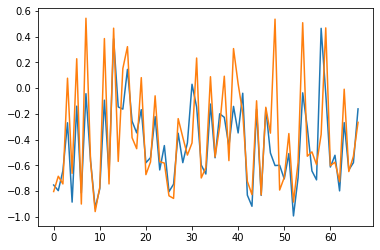

In [143]:
# Используем линейную регрессию
pred_lr = LinearRegression().fit(X_train, y_train)
y_pred_lr = pred_lr.predict(X_test)

plot(y_pred_lr)
plot(y_test)


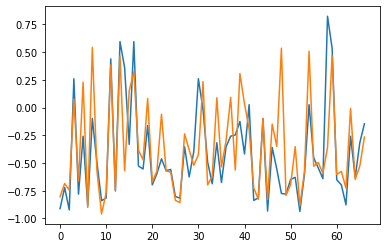

In [144]:
# Используем деревья решений
pred_dt = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dt = pred_dt.predict(X_test)
plot(y_pred_dt)
plot(y_test)

In [131]:
# Посмотрим метрики для линейной регресии

r2_score(y_test, y_pred_lr)
# Коэффициент детерминации

0.5566813547534646

In [145]:
mean_squared_error(y_test, y_pred_lr)
# Среднеквадратическая ошибка

0.07766168379801812

In [146]:
mean_absolute_error(y_test, y_pred_lr)
# Средняя абсолютная ошибка

0.1912231453213242

In [132]:
# Посмотрим метрики для деревьев решений

r2_score(y_test, y_pred_dt)
# Коэффициент детерминации

0.33914587719949796

In [134]:
mean_squared_error(y_test, y_pred_dt)
# Среднеквадратическая ошибка

0.11577010006652845

In [136]:
mean_absolute_error(y_test, y_pred_dt)
# Средняя абсолютная ошибка

0.21835771473757043

In [ ]:
# Судя по всему линейная регрессия дает лучший прогноз, чем деревья решений